In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Rastgele veri oluşturmak için sabitler
NUM_CUSTOMERS = 10000
START_DATE = datetime(2023, 1, 1)
END_DATE = datetime(2023, 12, 31)
SEGMENTS = ['VIP', 'Standart', 'Ekonomik']
CATEGORIES = ['Gıda', 'Elektronik', 'Eğlence', 'Seyahat']

# Müşteri ID'leri oluştur
customer_ids = [f"CUST{str(i).zfill(5)}" for i in range(1, NUM_CUSTOMERS + 1)]

# Rastgele veri oluşturma fonksiyonu
def create_transaction_data():
    data = []
    for customer_id in customer_ids:
        num_days = (END_DATE - START_DATE).days
        for day in range(num_days):
            date = START_DATE + timedelta(days=day)
            transaction_amount = round(random.uniform(10, 1000), 2)  # İşlem tutarı
            transaction_count = random.randint(1, 5)  # İşlem sayısı
            segment = random.choice(SEGMENTS)
            category = random.choice(CATEGORIES)
            data.append({
                'Müşteri ID': customer_id,
                'Tarih': date,
                'İşlem Tutarı': transaction_amount,
                'İşlem Sayısı': transaction_count,
                'Müşteri Segmenti': segment,
                'İşlem Kategorisi': category
            })
    return pd.DataFrame(data)

# Veri setini oluştur
df = create_transaction_data()

# CSV dosyasına kaydet
df.to_csv('customer_transactions.csv', index=False)

print("Veri seti oluşturuldu ve 'customer_transactions.csv' dosyasına kaydedildi.")

Veri seti oluşturuldu ve 'customer_transactions.csv' dosyasına kaydedildi.


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


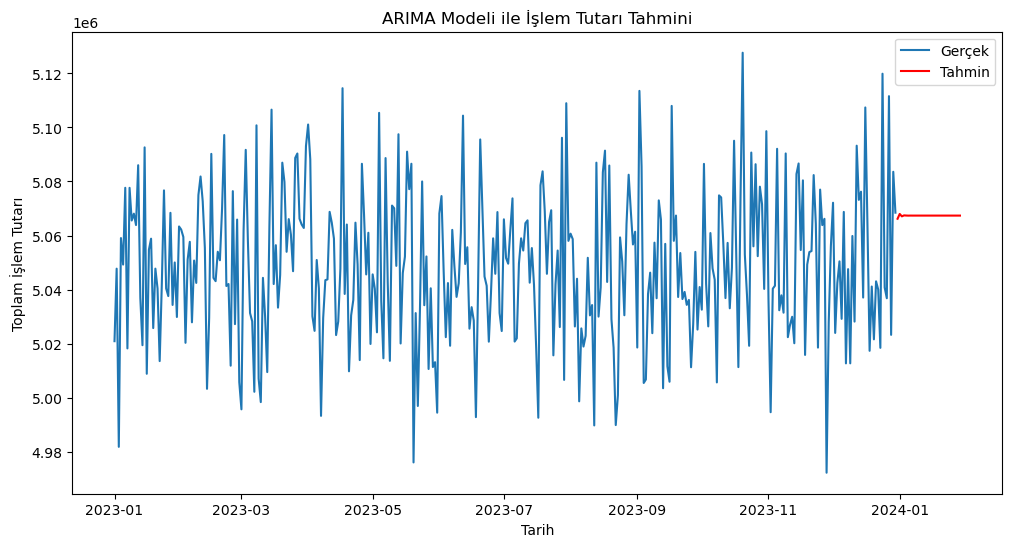

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Veri setini yükle
df = pd.read_csv('customer_transactions.csv', parse_dates=['Tarih'])

# Tarihe göre gruplama ve toplam işlem tutarını hesaplama
daily_data = df.groupby('Tarih')['İşlem Tutarı'].sum()

# ARIMA modeli oluşturma ve eğitme
model = ARIMA(daily_data, order=(5, 1, 0))
model_fit = model.fit()

# Tahminleri yapma
forecast = model_fit.forecast(steps=30)

# Grafik oluşturma
plt.figure(figsize=(12, 6))
plt.plot(daily_data, label='Gerçek')
plt.plot(forecast, label='Tahmin', color='red')
plt.title('ARIMA Modeli ile İşlem Tutarı Tahmini')
plt.xlabel('Tarih')
plt.ylabel('Toplam İşlem Tutarı')
plt.legend()
plt.show()

In [3]:
   pip install prophet

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
   pip install pystan

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for pystan from https://files.pythonhosted.org/packages/3f/7f/657d722f81035931513a9760751a215f09fb1474c15c043b5a5ed17e61ca/pystan-3.10.0-py3-none-any.whl.metadata
  Using cached pystan-3.10.0-py3-none-any.whl.metadata (3.7 kB)
  Obtaining dependency information for clikit<0.7,>=0.6 from https://files.pythonhosted.org/packages/f2/3d/4394c710b9195b83382dc67bdd1040e5ebfc3fc8df90e20fe74341298c57/clikit-0.6.2-py2.py3-none-any.whl.metadata
  Using cached clikit-0.6.2-py2.py3-none-any.whl.metadata (1.6 kB)
INFO: pip is looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
  Obtaining dependency information for pystan from https://files.pythonhosted.org/packages/20/e7/726e923d328524d0151080f5a1d20f57a025b6d2f72a252c2d2d7abe57f9/pystan-3.9.1-py3-none-any.whl.metadata
  Using cached pystan-3.9.1-py3-none-any.w

  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [6 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\USER\AppData\Local\Temp\pip-install-bn_rtaxl\pystan_baba7d6e8ad14e8597a81e65249e47ae\setup.py", line 122, in <module>
      from Cython.Build.Inline import _get_build_extension
  ModuleNotFoundError: No module named 'Cython'
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


14:41:46 - cmdstanpy - INFO - Chain [1] start processing
14:41:46 - cmdstanpy - INFO - Chain [1] done processing


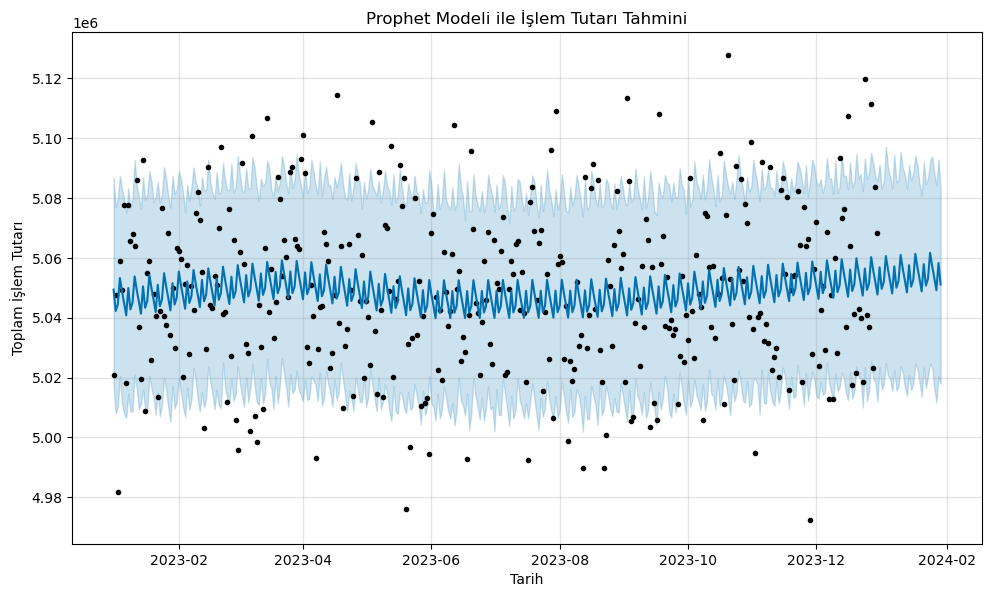

In [5]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Veri setini yükle
df = pd.read_csv('customer_transactions.csv', parse_dates=['Tarih'])

# Tarihe göre gruplama ve toplam işlem tutarını hesaplama
daily_data = df.groupby('Tarih')['İşlem Tutarı'].sum()

# Prophet için veri hazırlama
prophet_data = daily_data.reset_index()
prophet_data.columns = ['ds', 'y']

# Prophet modeli oluşturma ve eğitme
prophet_model = Prophet()
prophet_model.fit(prophet_data)

# Gelecek 30 gün için tahmin yapma
future = prophet_model.make_future_dataframe(periods=30)
forecast = prophet_model.predict(future)

# Grafik oluşturma
prophet_model.plot(forecast)
plt.title('Prophet Modeli ile İşlem Tutarı Tahmini')
plt.xlabel('Tarih')
plt.ylabel('Toplam İşlem Tutarı')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


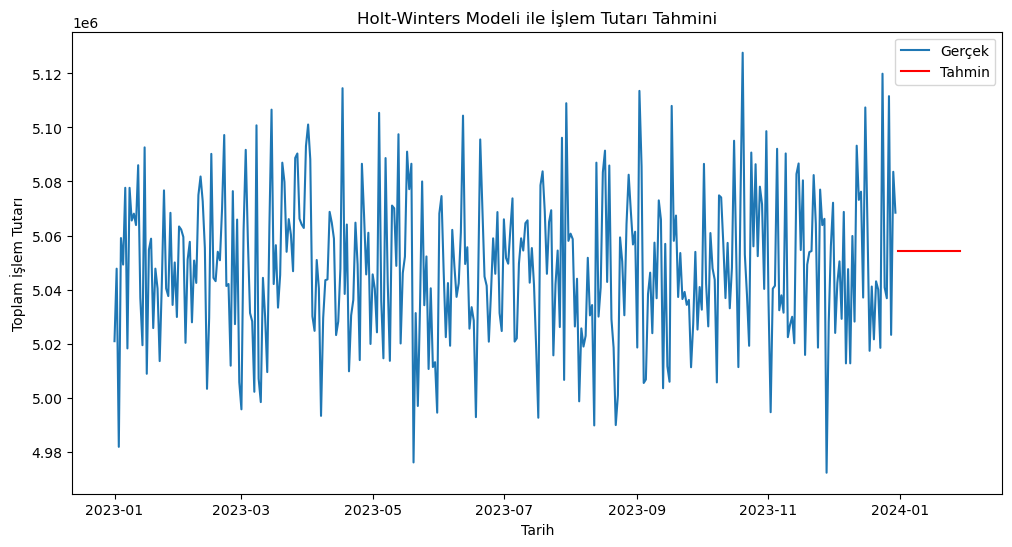

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Veri setini yükle
df = pd.read_csv('customer_transactions.csv', parse_dates=['Tarih'])

# Tarihe göre gruplama ve toplam işlem tutarını hesaplama
daily_data = df.groupby('Tarih')['İşlem Tutarı'].sum()

# Mevsimsel dönemleri ayarlama veya mevsimselliği kaldırma
# Eğer haftalık verileriniz varsa:
# model = ExponentialSmoothing(daily_data, seasonal='add', seasonal_periods=7)

# Eğer mevsimselliği kaldırmak istiyorsanız:
model = ExponentialSmoothing(daily_data, seasonal=None)

# Modeli eğitme
model_fit = model.fit()

# Tahminleri yapma
forecast = model_fit.forecast(steps=30)

# Grafik oluşturma
plt.figure(figsize=(12, 6))
plt.plot(daily_data, label='Gerçek')
plt.plot(forecast, label='Tahmin', color='red')
plt.title('Holt-Winters Modeli ile İşlem Tutarı Tahmini')
plt.xlabel('Tarih')
plt.ylabel('Toplam İşlem Tutarı')
plt.legend()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


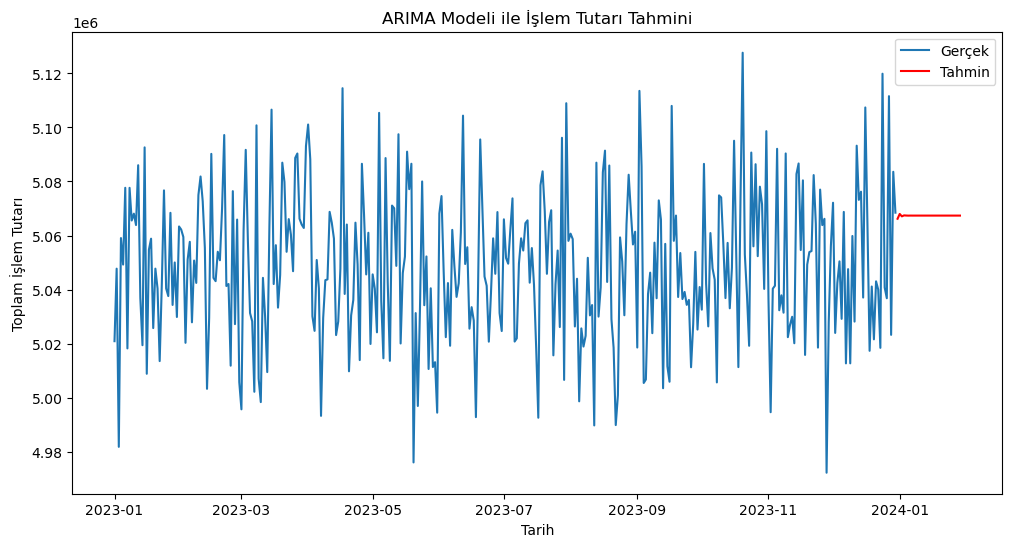

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Veri setini yükle
df = pd.read_csv('customer_transactions.csv', parse_dates=['Tarih'])

# Tarihe göre gruplama ve toplam işlem tutarını hesaplama
daily_data = df.groupby('Tarih')['İşlem Tutarı'].sum()

# ARIMA modeli oluşturma ve eğitme
model = ARIMA(daily_data, order=(5, 1, 0))
model_fit = model.fit()

# Tahminleri yapma
forecast = model_fit.forecast(steps=30)

# Grafik oluşturma
plt.figure(figsize=(12, 6))
plt.plot(daily_data, label='Gerçek')
plt.plot(forecast, label='Tahmin', color='red')
plt.title('ARIMA Modeli ile İşlem Tutarı Tahmini')
plt.xlabel('Tarih')
plt.ylabel('Toplam İşlem Tutarı')
plt.legend()

# Grafiği kaydetme
plt.savefig('arima_forecast.png')

plt.show()

14:52:57 - cmdstanpy - INFO - Chain [1] start processing
14:52:57 - cmdstanpy - INFO - Chain [1] done processing


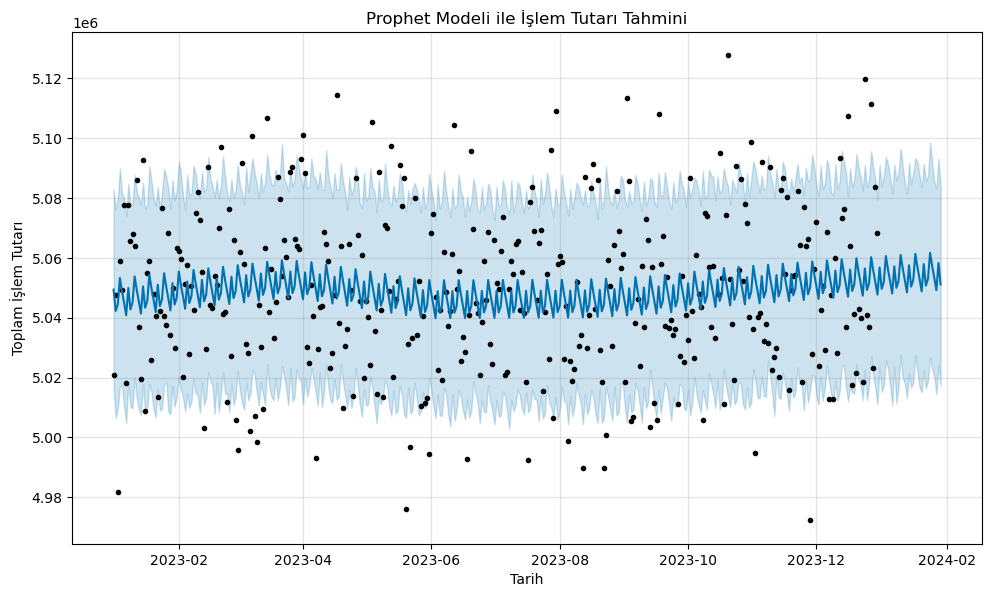

In [9]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Veri setini yükle
df = pd.read_csv('customer_transactions.csv', parse_dates=['Tarih'])

# Tarihe göre gruplama ve toplam işlem tutarını hesaplama
daily_data = df.groupby('Tarih')['İşlem Tutarı'].sum()

# Prophet için veri hazırlama
prophet_data = daily_data.reset_index()
prophet_data.columns = ['ds', 'y']

# Prophet modeli oluşturma ve eğitme
prophet_model = Prophet()
prophet_model.fit(prophet_data)

# Gelecek 30 gün için tahmin yapma
future = prophet_model.make_future_dataframe(periods=30)
forecast = prophet_model.predict(future)

# Grafik oluşturma
fig = prophet_model.plot(forecast)
plt.title('Prophet Modeli ile İşlem Tutarı Tahmini')
plt.xlabel('Tarih')
plt.ylabel('Toplam İşlem Tutarı')

# Grafiği kaydetme
fig.savefig('prophet_forecast.png')

plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


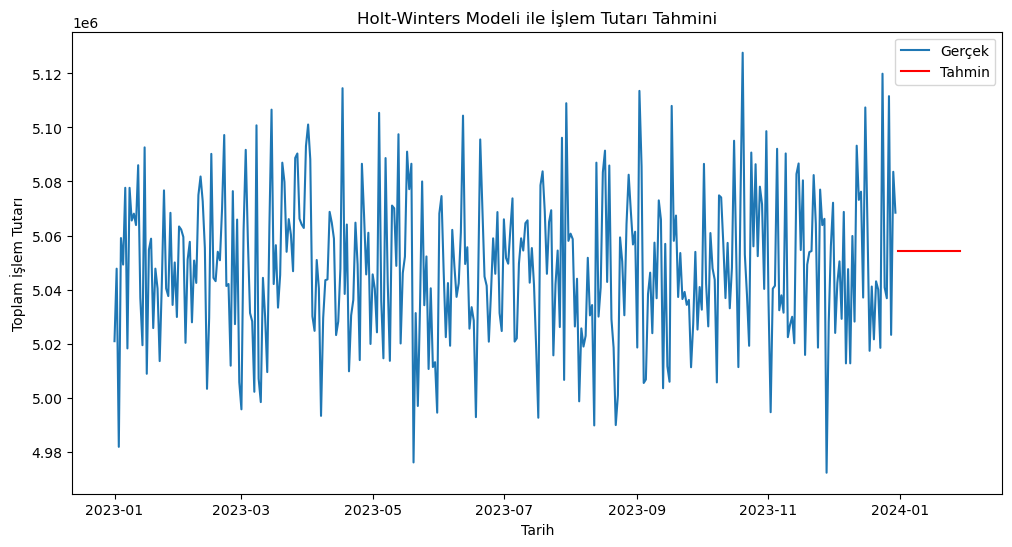

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Veri setini yükle
df = pd.read_csv('customer_transactions.csv', parse_dates=['Tarih'])

# Tarihe göre gruplama ve toplam işlem tutarını hesaplama
daily_data = df.groupby('Tarih')['İşlem Tutarı'].sum()

# Holt-Winters modeli oluşturma ve eğitme
model = ExponentialSmoothing(daily_data, seasonal=None)
model_fit = model.fit()

# Tahminleri yapma
forecast = model_fit.forecast(steps=30)

# Grafik oluşturma
plt.figure(figsize=(12, 6))
plt.plot(daily_data, label='Gerçek')
plt.plot(forecast, label='Tahmin', color='red')
plt.title('Holt-Winters Modeli ile İşlem Tutarı Tahmini')
plt.xlabel('Tarih')
plt.ylabel('Toplam İşlem Tutarı')
plt.legend()

# Grafiği kaydetme
plt.savefig('holt_winters_forecast.png')

plt.show()